# Import Necessary Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#Import The DataSet
df=pd.read_csv("tested.csv")

In [6]:
#It will Show the fiorst 5 rows of Our dataSet
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Check the shape of our dataSet
df.shape

(418, 12)

In [8]:
#columns lists in our dataset
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
#To Checking The Null Values in Our Data Set 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#cabin Columns have more then 80 percent missing values so we will drop this column
df.drop(columns=["Cabin"],inplace=True)

In [14]:
#know Missing Values for age we will use startegy ---Mean 
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [16]:
#know we will fil the missing value in the FAre column
df["Fare"].fillna(df["Fare"].mean(),inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
#Some columns Convert itno category columns

df["Survived"]=df["Survived"].astype("category")
df["Pclass"]=df["Pclass"].astype("category")
df["Sex"]=df["Sex"].astype("category")
df["Age"]=df["Age"].astype("int64")
df["Embarked"]=df["Embarked"].astype("category")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    int64   
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    float64 
 10  Embarked     418 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 25.1+ KB


In [26]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.191388,0.447368,0.392344,35.627188
std,120.810458,12.654104,0.896760,0.981429,55.840500
min,892.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S


# univariate Data Analysis

In [38]:
#univariate Data Analysis
# sns.countplot(df['Survived'])
# death_percent=round((df['Survived'].value_counts().values[0]/418)*100)
# print("Out of 418 {}% people died in the Accident".format(death_percent))


Out of 418 passengers, 64% people died in the accident


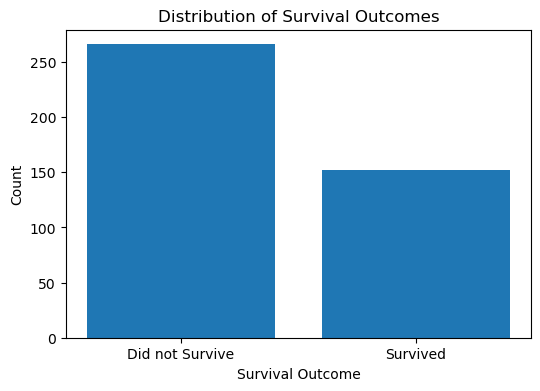

In [42]:
#univariate Data Analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4)) 
plt.bar(df['Survived'].value_counts().index, df['Survived'].value_counts(), tick_label=['Did not Survive', 'Survived'])
plt.xlabel('Survival Outcome')
plt.ylabel('Count')
plt.title('Distribution of Survival Outcomes')
death_percent = round((df['Survived'].value_counts().values[0] / len(df)) * 100)
print("Out of {} passengers, {}% people died in the accident".format(len(df), death_percent))
plt.show()  



In [50]:
print((df['Pclass'].value_counts()/418)*100)


3    52.153110
1    25.598086
2    22.248804
Name: Pclass, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

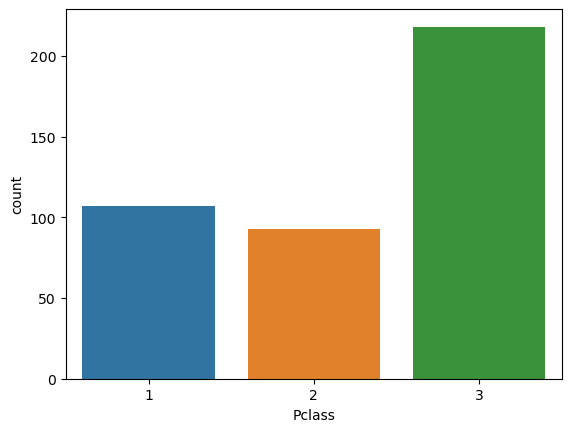

In [52]:
sns.countplot(x='Pclass', data=df)


male      63.636364
female    36.363636
Name: Sex, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

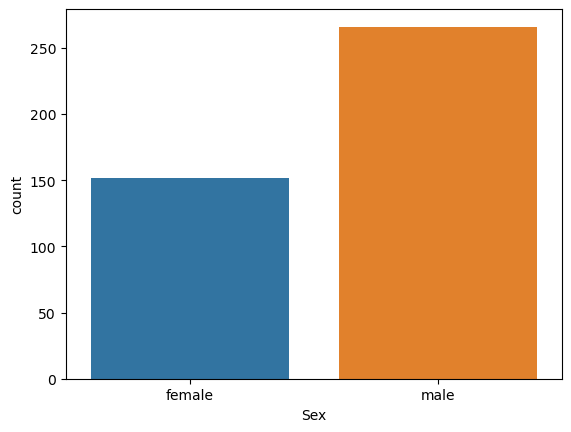

In [53]:
print((df['Sex'].value_counts()/418)*100)
sns.countplot(x='Sex', data=df)

0    67.703349
1    26.315789
2     3.349282
3     0.956938
4     0.956938
8     0.478469
5     0.239234
Name: SibSp, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

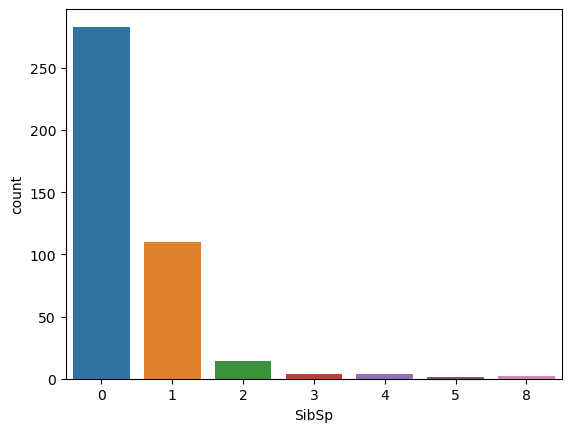

In [54]:
print((df['SibSp'].value_counts()/418)*100)
sns.countplot(x='SibSp', data=df)

0    77.511962
1    12.440191
2     7.894737
3     0.717703
4     0.478469
9     0.478469
6     0.239234
5     0.239234
Name: Parch, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

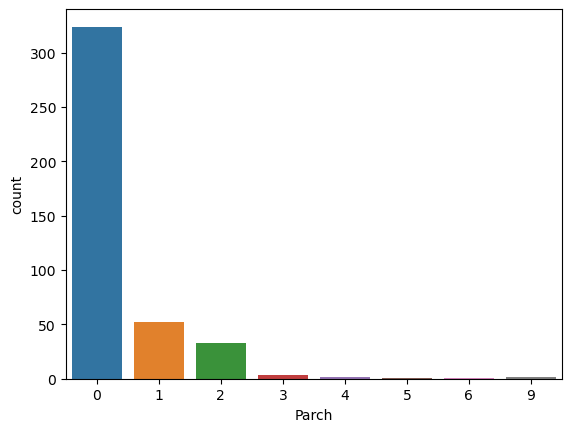

In [55]:
print((df['Parch'].value_counts()/418)*100)
sns.countplot(x='Parch', data=df)

S    64.593301
C    24.401914
Q    11.004785
Name: Embarked, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

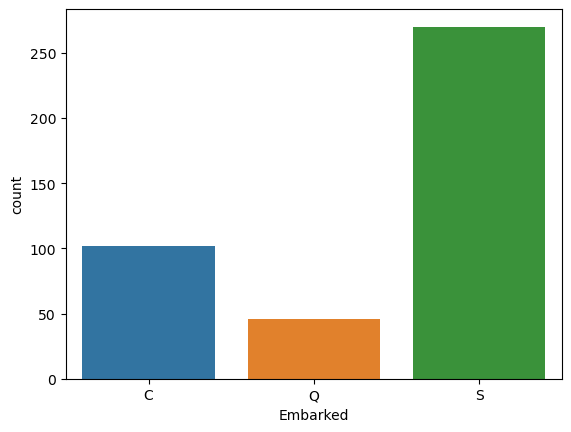

In [56]:
print((df['Embarked'].value_counts()/418)*100)
sns.countplot(x='Embarked', data=df)

C:\Users\farha\AppData\Local\Temp\ipykernel_14652\1410678630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


0.516080054627597
0.9003780571212805


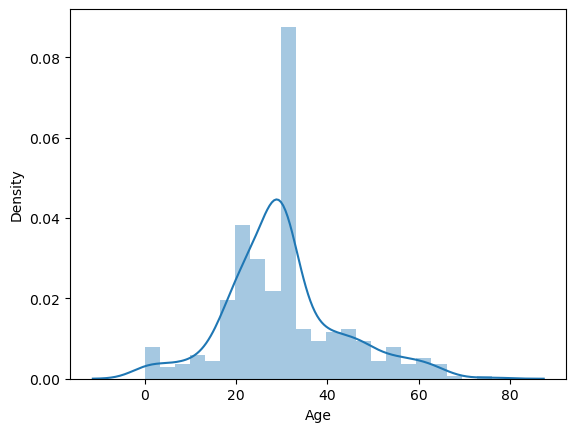

In [57]:
sns.distplot(df["Age"])
print(df["Age"].skew())
print(df["Age"].kurt())

<Axes: >

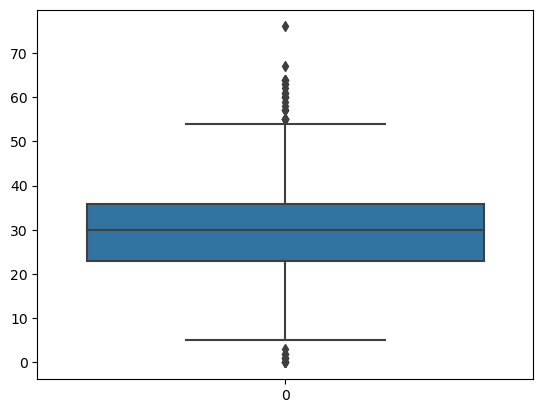

In [58]:
sns.boxplot(df["Age"])

In [59]:
# Just out of curiosity
print("People with age in between 60 and 70 are", df[(df["Age"]>60) & (df["Age"]<70)].shape[0])
print("People with age in between 70 and 75 are", df[(df["Age"]>=70) & (df["Age"]<=75)].shape[0])
print("People with age greater then 75 are", df[df["Age"]>75].shape[0])
print('-'*50)
print("people with the age between 0 and 1",df[df["Age"]<1].shape[0] )
                                                

People with age in between 60 and 70 are 9
People with age in between 70 and 75 are 0
People with age greater then 75 are 1
--------------------------------------------------
people with the age between 0 and 1 5


<Axes: >

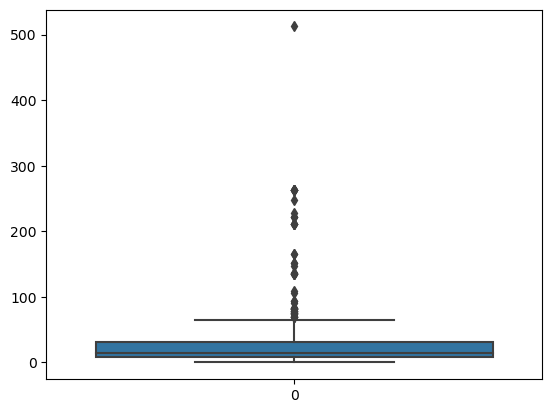

In [60]:
sns.boxplot(df["Fare"])

In [61]:
print(df["Fare"].skew())
print(df["Fare"].kurt())

3.6915998329393105
17.971266196944526


<Axes: >

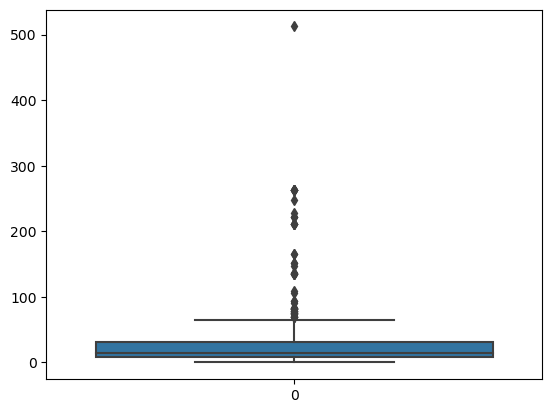

In [62]:
sns.boxplot(df["Fare"])

In [64]:
print("People with fare between $200 and $300",df[(df["Fare"]> 200) & (df["Fare"]<300)].shape[0])

print("people with Fare Greater then $300", df[df["Fare"]>300].shape[0])

People with fare between $200 and $300 17
people with Fare Greater then $300 1


# MultiVarient Data Analysis

In [71]:
#MultiVarient DAta Analysis 

# sns.countplot(df["Survived"],hue=df["Pclass"],data=df)
# pd.crosstab(df["Pclass"],df["Survived"]).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Percentage of survivors in each passenger class:
Survived     0     1
Pclass              
1         53.3  46.7
2         67.7  32.3
3         67.0  33.0


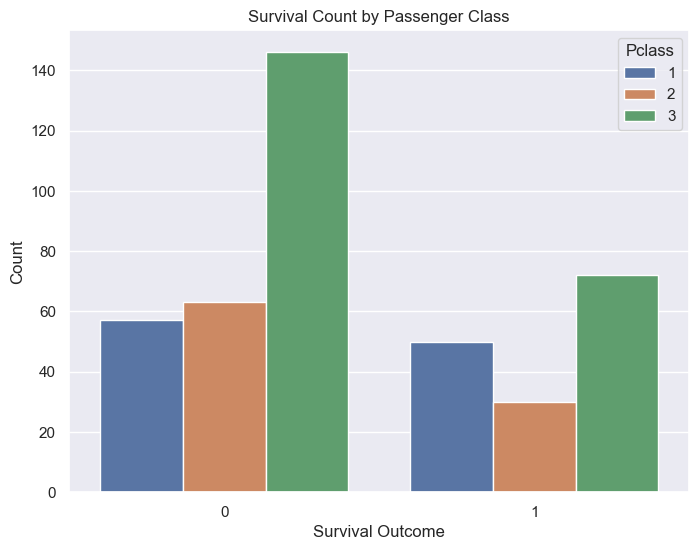

In [72]:
sns.set(style="darkgrid")  
plt.figure(figsize=(8, 6)) 
ax = sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survival Outcome')
plt.ylabel('Count')
survival_percentage = pd.crosstab(df["Pclass"], df["Survived"]).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)
print("Percentage of survivors in each passenger class:")
print(survival_percentage)
plt.show()  

Percentage of survivors by gender:
Survived      0      1
Sex                   
female      0.0  100.0
male      100.0    0.0


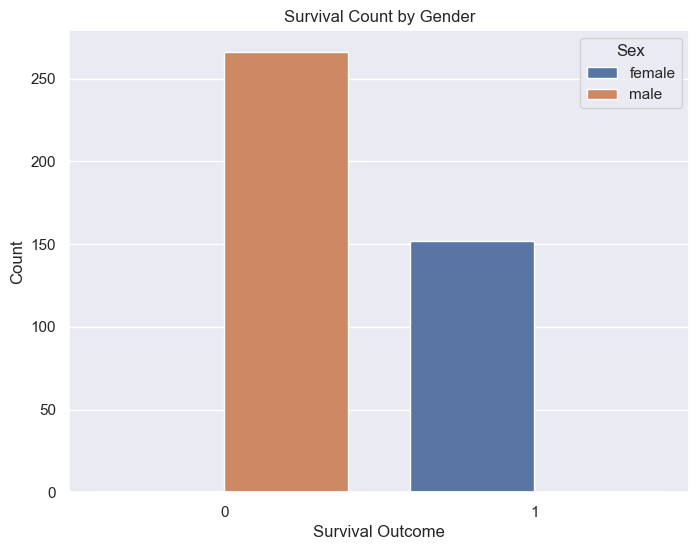

In [74]:
#survival with Sex
sns.set(style="darkgrid")  
plt.figure(figsize=(8, 6))  
ax = sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survival Outcome')
plt.ylabel('Count')
survival_percentage = pd.crosstab(df["Sex"], df["Survived"]).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)
print("Percentage of survivors by gender:")
print(survival_percentage)
plt.show()

Percentage of survivors by Embarked:
Survived     0     1
Embarked            
C         60.8  39.2
Q         47.8  52.2
S         67.4  32.6
Percentage of passengers by Embarked:
S    64.6
C    24.4
Q    11.0
Name: Embarked, dtype: float64


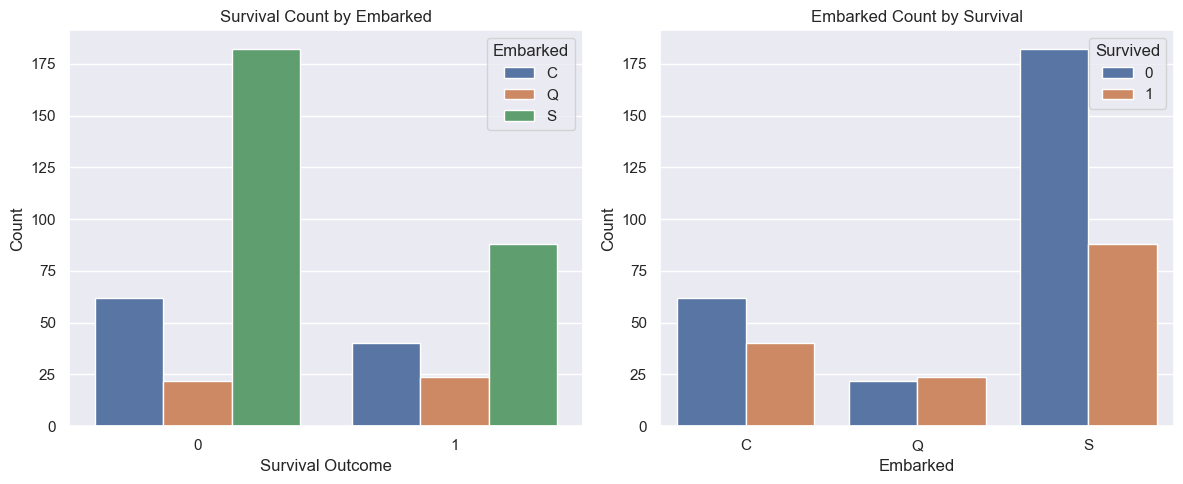

In [76]:
plt.figure(figsize=(12, 5))  
plt.subplot(1, 2, 1)  
sns.countplot(x='Survived', data=df, hue='Embarked')
plt.title('Survival Count by Embarked')
plt.xlabel('Survival Outcome')
plt.ylabel('Count')
survival_percentage_by_embarked = pd.crosstab(df["Embarked"], df["Survived"]).apply(lambda r: round((r / r.sum()) * 100, 1), axis=1)
print("Percentage of survivors by Embarked:")
print(survival_percentage_by_embarked)


plt.subplot(1, 2, 2)  
sns.countplot(x='Embarked', data=df, hue='Survived')
plt.title('Embarked Count by Survival')
plt.xlabel('Embarked')
plt.ylabel('Count')


embarked_percentage = round((df["Embarked"].value_counts() / len(df)) * 100, 1)
print("Percentage of passengers by Embarked:")
print(embarked_percentage)

plt.tight_layout()  
plt.show() 

C:\Users\farha\AppData\Local\Temp\ipykernel_14652\3089395217.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]["Age"])
C:\Users\farha\AppData\Local\Temp\ipykernel_14652\3089395217.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]["Age"])


<Axes: xlabel='Age', ylabel='Density'>

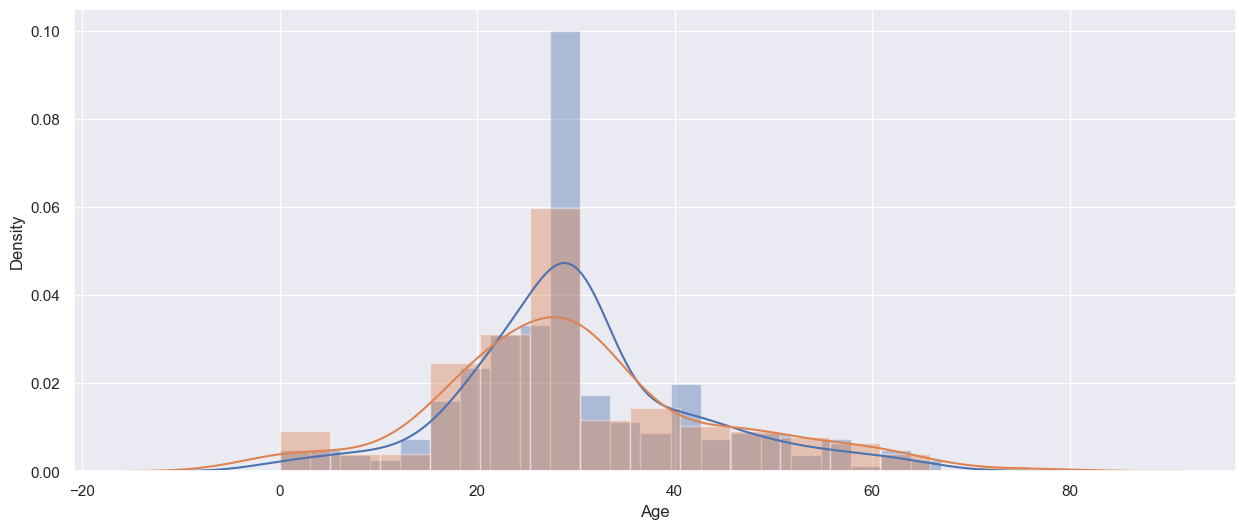

In [77]:
# survived with Age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]["Age"])
sns.distplot(df[df['Survived']==1]["Age"])

C:\Users\farha\AppData\Local\Temp\ipykernel_14652\3610295323.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==0]["Fare"])
C:\Users\farha\AppData\Local\Temp\ipykernel_14652\3610295323.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived']==1]["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

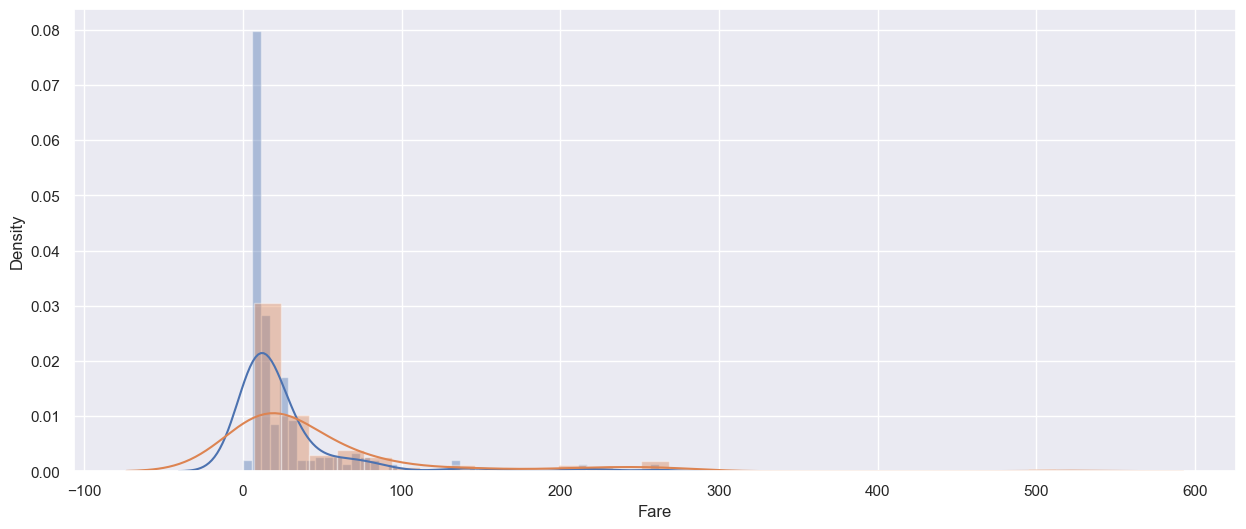

In [78]:
# survived with FAre
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]["Fare"])
sns.distplot(df[df['Survived']==1]["Fare"])

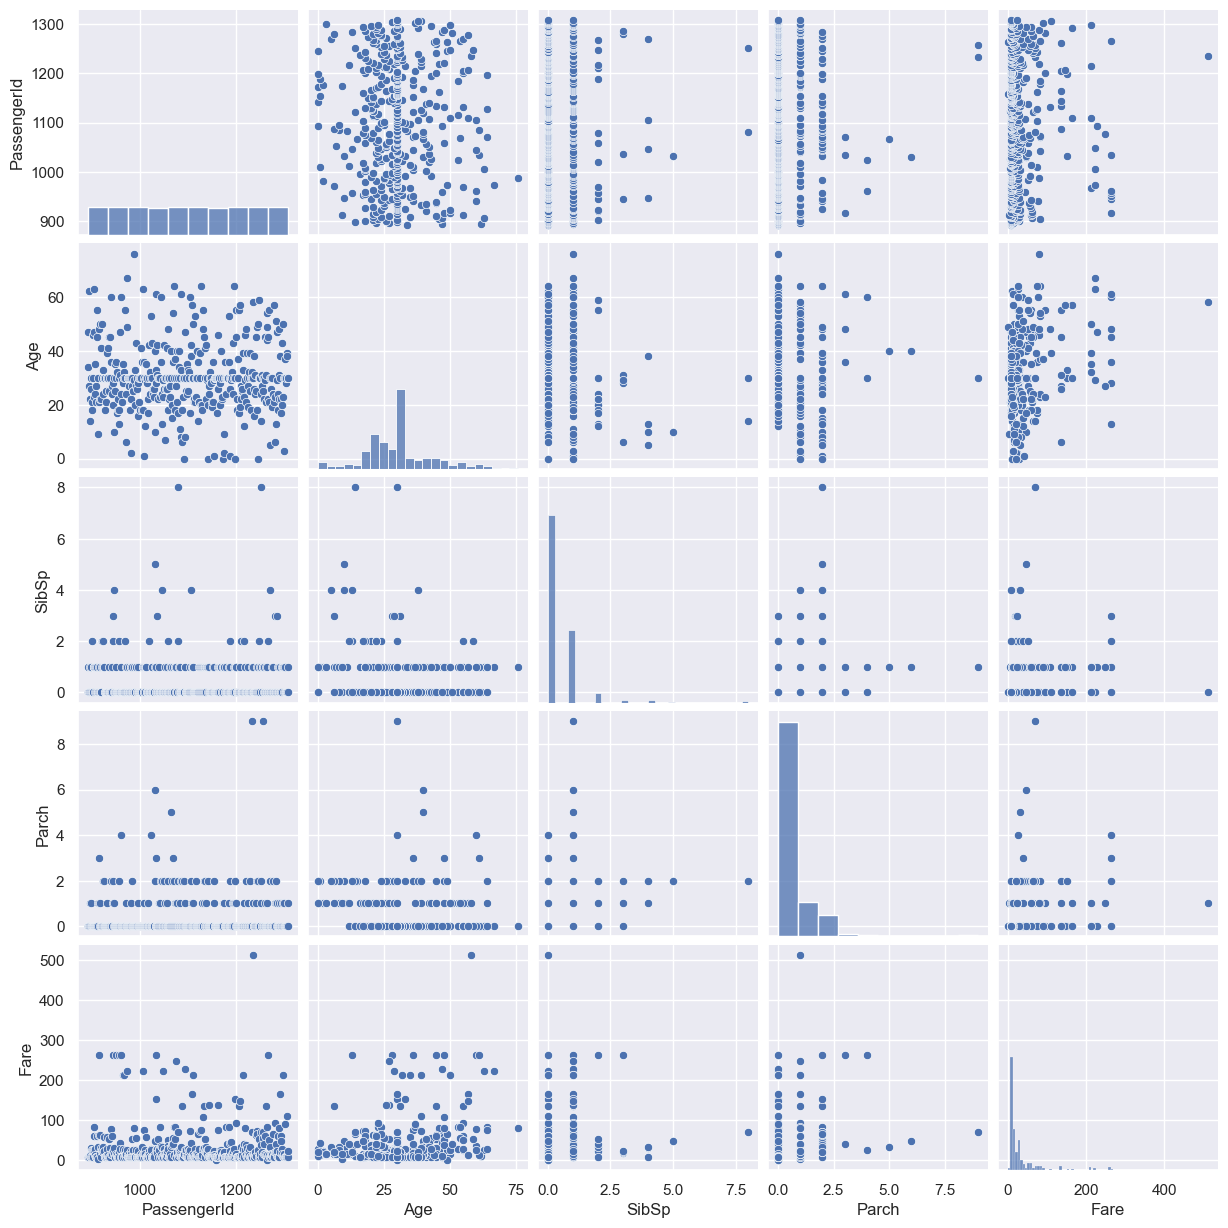

In [79]:
sns.pairplot(df)

C:\Users\farha\AppData\Local\Temp\ipykernel_14652\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

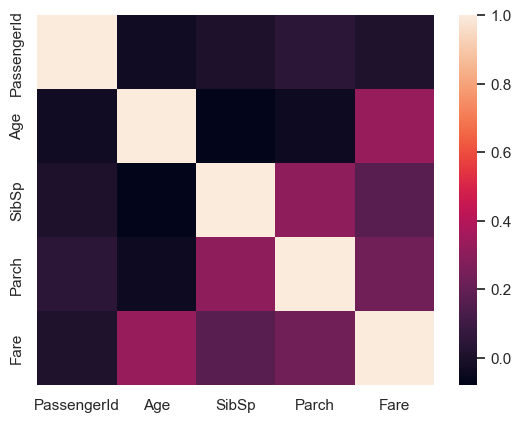

In [80]:
sns.heatmap(df.corr())

# Feature Engineering

In [81]:
# We will crteate a new columns that will be the sum of sibsp and parch

In [82]:
df["Family_size"]=df["Parch"]+df["SibSp"]

In [83]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
172,1064,0,3,"Dyker, Mr. Adolf Fredrik",male,23,1,0,347072,13.9000,S,1
66,958,1,3,"Burns, Miss. Mary Delia",female,18,0,0,330963,7.8792,Q,0
344,1236,0,3,"van Billiard, Master. James William",male,30,1,1,A/5. 851,14.5000,S,2
78,970,0,2,"Aldworth, Mr. Charles Augustus",male,30,0,0,248744,13.0000,S,0
311,1203,0,3,"Vartanian, Mr. David",male,22,0,0,2658,7.2250,C,0


In [84]:
def family_type(number):
    if number==0:
        return "Alone"
    elif number >0 and number<=4:
        return "Medium"
    else:
        return "Large"
    

In [85]:
df["family_type"]=df["Family_size"].apply(family_type)

In [86]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,family_type
92,984,1,1,"Davidson, Mrs. Thornton (Orian Hays)",female,27,1,2,F.C. 12750,52.0000,S,3,Medium
194,1086,0,2,"Drew, Master. Marshall Brines",male,8,0,2,28220,32.5000,S,2,Medium
283,1175,1,3,"Touma, Miss. Maria Youssef",female,9,1,1,2650,15.2458,C,2,Medium
17,909,0,3,"Assaf, Mr. Gerios",male,21,0,0,2692,7.2250,C,0,Alone
99,991,0,3,"Nancarrow, Mr. William Henry",male,33,0,0,A./5. 3338,8.0500,S,0,Alone


In [87]:
#Dropping SibSp parch family_size


df.drop(columns=["SibSp", "Parch", "Family_size"],inplace=True)

In [88]:
pd.crosstab(df['family_type'],df["Survived"]).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
family_type,,
Alone,73.1,26.9
Large,53.8,46.2
Medium,48.7,51.3


# Detacting OutLiers

In [89]:
#Handling outliers from fare colums
#find fourth_Quartile

In [90]:
Q1=np.percentile(df["Fare"],25)
Q3=np.percentile(df["Fare"],75)

outlier_low=Q1-1.5*(Q3-Q1)
outlier_high=Q3+1.5*(Q3-Q1)

df=df[(df["Fare"]>outlier_low)&(df["Fare"]<outlier_high)]

In [92]:
#one hot encoding
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
130,1022,0,3,"Spinner, Mr. Henry John",male,32,STON/OQ. 369943,8.0500,S,Alone
37,929,1,3,"Cacic, Miss. Manda",female,21,315087,8.6625,S,Alone
31,923,0,2,"Jefferys, Mr. Clifford Thomas",male,24,C.A. 31029,31.5000,S,Medium
312,1204,0,3,"Sadowitz, Mr. Harry",male,30,LP 1588,7.5750,S,Alone


In [93]:
pd.get_dummies(data=df,columns=["Pclass","Sex","Embarked","family_type"],drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,892,0,"Kelly, Mr. James",34,330911,7.8292,0,1,1,1,0,0,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47,363272,7.0000,0,1,0,0,1,0,1
2,894,0,"Myles, Mr. Thomas Francis",62,240276,9.6875,1,0,1,1,0,0,0
3,895,0,"Wirz, Mr. Albert",27,315154,8.6625,0,1,1,0,1,0,0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,3101298,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,"Henriksson, Miss. Jenny Lovisa",28,347086,7.7750,0,1,0,0,1,0,0
413,1305,0,"Spector, Mr. Woolf",30,A.5. 3236,8.0500,0,1,1,0,1,0,0
415,1307,0,"Saether, Mr. Simon Sivertsen",38,SOTON/O.Q. 3101262,7.2500,0,1,1,0,1,0,0
416,1308,0,"Ware, Mr. Frederick",30,359309,8.0500,0,1,1,0,1,0,0


In [94]:
df=pd.get_dummies(data=df,columns=["Pclass","Sex","Embarked","family_type"],drop_first=True)

In [95]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Fare', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'family_type_Large',
       'family_type_Medium'],
      dtype='object')

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
X = df[['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male']]
y = df['Survived']

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Standardize features (if needed, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [101]:
# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [102]:
# Predict on the test set
y_pred = model.predict(X_test)

In [103]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[41  0]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        32

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

